In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
df = pd.read_csv('mainset.csv')
df.drop(columns=['Unnamed: 0','nba_comment'], inplace=True)
df.isna().sum().sort_values(0, ascending=False).head()

nba_start_position    245641
br_game_score              0
nba_fgm                    0
nba_reb                    0
nba_dreb                   0
dtype: int64

In [5]:
df.shape

(514704, 57)

In [6]:
import itertools

unique_start_positions = list(df.nba_start_position.unique())

possible_combinations = []

for length in range(1, len(unique_start_positions)+1):
    for comb in itertools.combinations(unique_start_positions, length):
        possible_combinations.append(comb)
        

possible_combinations

[(nan,),
 ('C',),
 ('G',),
 ('F',),
 (nan, 'C'),
 (nan, 'G'),
 (nan, 'F'),
 ('C', 'G'),
 ('C', 'F'),
 ('G', 'F'),
 (nan, 'C', 'G'),
 (nan, 'C', 'F'),
 (nan, 'G', 'F'),
 ('C', 'G', 'F'),
 (nan, 'C', 'G', 'F')]

In [11]:
def position_create(unique_start_positions):
    if len(unique_start_positions)==1:
        return unique_start_positions[0]
    elif len(unique_start_positions)==2:
        if np.nan in unique_start_positions:
            if 'G' in unique_start_positions:
                return 'G'
            elif 'C' in unique_start_positions:
                return 'C'
            elif 'F' in unique_start_positions:
                return 'F'
        else:
            if 'G' in unique_start_positions:
                return 'G/F'
            elif 'C' in unique_start_positions:
                return 'F/C'
    elif len(unique_start_positions)==3:
        if np.nan in unique_start_positions:
            if 'G' in unique_start_positions:
                return 'G/F'
            elif 'C' in unique_start_positions:
                return 'F/C'
        else:
            return 'G/F/C'
    elif len(unique_start_positions)==4: return 'G/F/C'

In [39]:
position_dict = {}
for pid in df.nba_player_id.unique():
    position_dict[pid] = position_create(
        list(df[df.nba_player_id==pid]['nba_start_position'].unique()))

In [40]:
xf = pd.get_dummies(df, columns=['nba_start_position'])

In [41]:
unique_pids = list(xf.nba_player_id.unique())

In [42]:
data = xf.groupby(['nba_player_id','nba_player_name'])
start_position = data[[col for col in xf if 'start' in col]].sum()
start_position['total_starts'] = start_position.sum(axis=1)

start_position['nba_start_position_C'] = \
(start_position['nba_start_position_C'] / start_position['total_starts'])
start_position['nba_start_position_G'] = \
(start_position['nba_start_position_G'] / start_position['total_starts'])
start_position['nba_start_position_F'] = \
(start_position['nba_start_position_F'] / start_position['total_starts'])

In [38]:
# List of players who have started at least one game in all 3 positions
# most of these players can be considered as predominately Forwards
# Quite alot of famous players (and more recent players) including
# Jerry Stackhouse, the official NBA logo
start_position[(start_position['nba_start_position_C']!=0)&
               (start_position['nba_start_position_F']!=0)&
               (start_position['nba_start_position_G']!=0)&
               (start_position['total_starts']!=0)].index

MultiIndex([(     63,           'Michael Smith'),
            (     95,             'Mark Bryant'),
            (    198,             'Danny Ferry'),
            (    270,            'Horace Grant'),
            (    363,      'Christian Laettner'),
            (    371,             'Terry Mills'),
            (    677,           'Eric Williams'),
            (    680,            'John Amaechi'),
            (    711,        'Jerry Stackhouse'),
            (    952,          'Antoine Walker'),
            (    962,          'Walter McCarty'),
            (    970,      'Othella Harrington'),
            (    998,               'Mark Pope'),
            (   1005,           'Walt Williams'),
            (   1501,              'Tim Thomas'),
            (   1712,          'Antawn Jamison'),
            (   1733,           'Al Harrington'),
            (   1763,              'Ryan Bowen'),
            (   1887,        'Wally Szczerbiak'),
            (   1894,          'Corey Maggette'),


In [45]:
# Players who have not started a game but played
# in at least one game for longer than 5 minutes

start_position[start_position['total_starts']==0]

MultiIndex([(     31,   'Lorenzo Williams'),
            (     51, 'Mahmoud Abdul-Rauf'),
            (     67,       'Tom Hammonds'),
            (     82,    'Bill Wennington'),
            (     85,        'Brent Price'),
            (    134,      'Kevin Johnson'),
            (    156,       'Antoine Carr'),
            (    170,         'Joe Kleine'),
            (    180,        'John Crotty'),
            (    187,     'Terry Cummings'),
            ...
            (1629731,          'Dean Wade'),
            (1629734,     'Kyle Alexander'),
            (1629735,        'Chris Silva'),
            (1629738,    'Vincent Poirier'),
            (1629739,     'William Howard'),
            (1629741,      'Marko Guduric'),
            (1629742,       'Stanton Kidd'),
            (1629743,         'Donta Hall'),
            (1629745,        'Tariq Owens'),
            (1629760,        'Matt Mooney')],
           names=['nba_player_id', 'nba_player_name'], length=449)

In [47]:
multi_potentialites = start_position[(start_position['nba_start_position_C']!=0)&
                                     (start_position['nba_start_position_F']!=0)&
                                     (start_position['nba_start_position_G']!=0)&
                                     (start_position['total_starts']!=0)].copy()

In [68]:
multi_potentialites.index.map(lambda x: position_dict[x[0]])

Index(['G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C',
       'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C',
       'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C',
       'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C',
       'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C',
       'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C',
       'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C',
       'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C', 'G/F/C'],
      dtype='object')

In [10]:
df.nba_start_position = df.nba_player_id.map(position_dict)
df.isna().sum()

nba_game_date               0
nba_season_id               0
br_location                 0
nba_gm_type                 0
br_outcome                  0
home_plus_minus             0
nba_game_id                 0
nba_team_id                 0
nba_team_abbreviation       0
nba_team_city               0
nba_player_id               0
nba_player_name             0
nba_start_position       6026
nba_seconds                 0
nba_fgm                     0
nba_fga                     0
nba_fg_pct                  0
nba_fg3m                    0
nba_fg3a                    0
nba_fg3_pct                 0
nba_ftm                     0
nba_fta                     0
nba_ft_pct                  0
nba_oreb                    0
nba_dreb                    0
nba_reb                     0
nba_ast                     0
nba_stl                     0
nba_blk                     0
nba_to                      0
nba_pf                      0
nba_pts                     0
nba_plus_minus              0
birthdate 

### 6026 null values left
- these will be performances by players who have never started a game before (449)
- also need to look at the players who have apparently started across all three positions (61)

In [19]:
len(df[df.nba_start_position=='G/F/C']['nba_player_name'].unique()), \
len(df[df.nba_start_position.isnull()]['nba_player_name'].unique())

(61, 449)

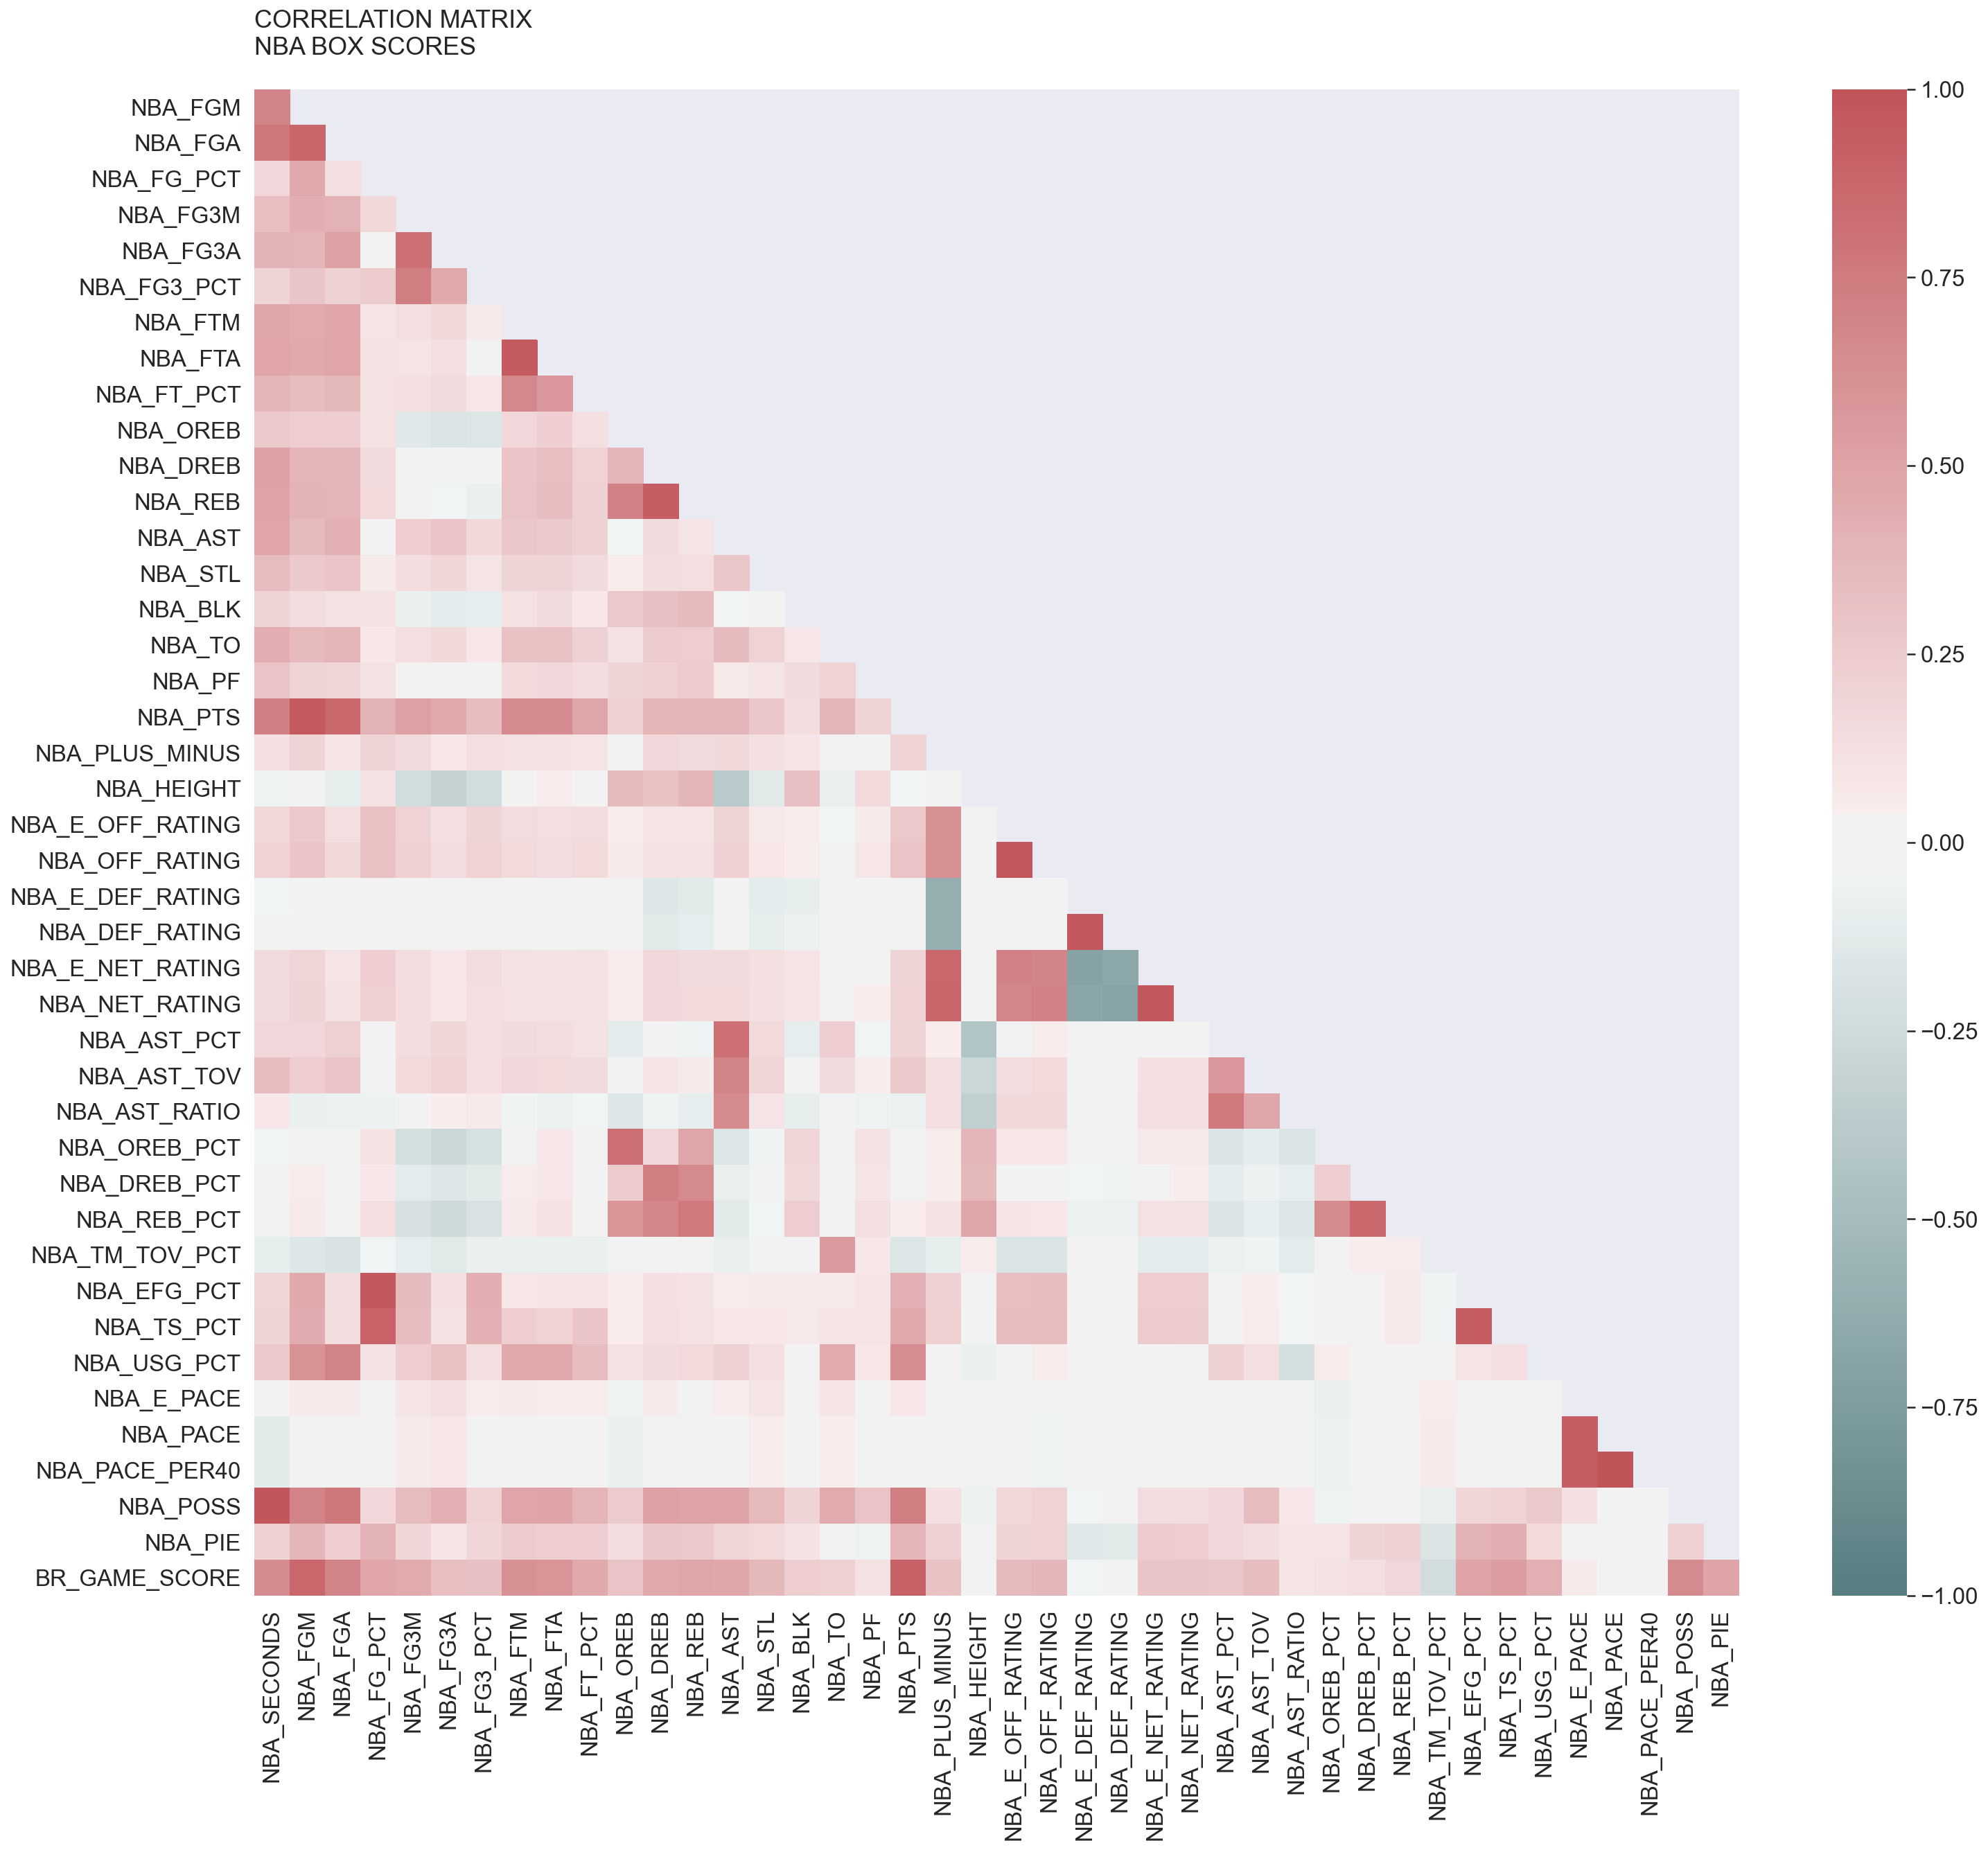

In [21]:
df_corr = df.loc[:,'nba_seconds':].corr()
fig, ax = plt.subplots(figsize=(24, 20))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(200, 10, 50, n=9, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nNBA BOX SCORES\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

In [24]:
import pickle

with open('position_dict.pickle', 'wb') as f:
    pickle.dump(position_dict, f)